In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/preprocessed_data.csv')

In [3]:
data.shape

(10411, 28)

In [4]:
data.columns

Index(['idle-cycles-frontend-percent', 'L1-dcache-load-misses',
       'branch-instructions', 'dTLB-load-misses-percent', 'input-size',
       'cpu-used', 'L1-dcache-prefetches', 'threads',
       'iTLB-load-misses-percent', 'iTLB-loads', 'cpu-cycles',
       'cache-misses-percent', 'dTLB-loads', 'benchmarks', 'user-time',
       'instructions', 'cache-references', 'L1-dcache-loads', 'cpu-clock',
       'instructions_per_cycle', 'branch-loads', 'dTLB-load-misses',
       'LLC-loads', 'L1-icache-load-misses-percent', 'task-clock',
       'L1-icache-loads', 'LLC-load-misses-percent', 'Speedup'],
      dtype='object')

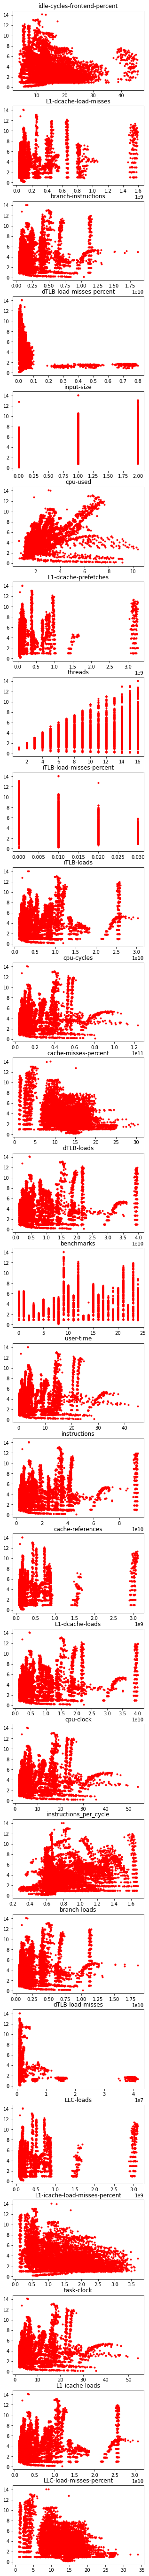

In [5]:
fig, ax = plt.subplots(nrows=27, ncols=1, figsize=(5, 100))
for i in range(len(data.columns)-1):
    ax[i].plot(data[data.columns[i]],data['Speedup'],'.r')

for i in range(len(data.columns)-1):
    ax[i].set_title(data.columns[i])